In [1]:
#!pip install tensorflow==2.2

### Imports 

In [13]:
%matplotlib inline
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import utils
import matplotlib.pyplot as plt
import tensorflow as tf
import pandas as pd
import numpy as np

In [14]:
print(f'Using TensorFlow version: {tf.__version__}')

Using TensorFlow version: 2.2.0


### Load Data

In [15]:
# load the pre-shuffled train and test data
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

In [16]:
X_train.shape

(50000, 32, 32, 3)

In [17]:
y_train.shape

(50000, 1)

In [18]:
X_test.shape

(10000, 32, 32, 3)

In [19]:
y_test.shape

(10000, 1)

### Explore Data

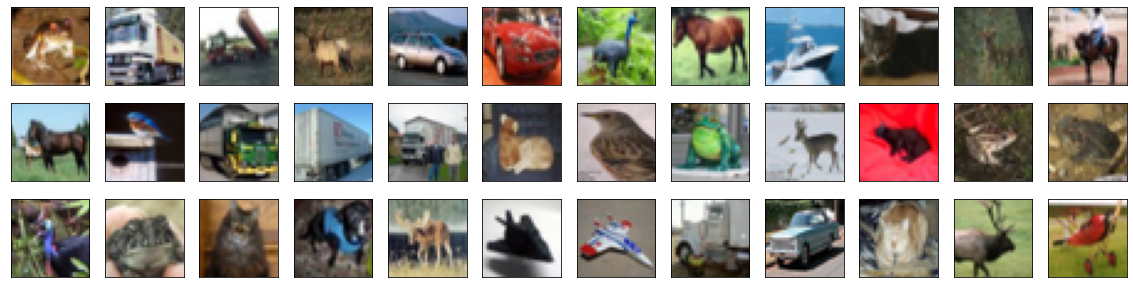

In [20]:
fig = plt.figure(figsize=(20, 5))
for i in range(36):
    ax = fig.add_subplot(3, 12, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_train[i]))

### Prep Data

#### Rescale

In [21]:
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255

In [22]:
X_train.shape

(50000, 32, 32, 3)

### Split Data 

In [23]:
# one-hot encode the labels
num_classes = len(np.unique(y_train))
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [24]:
y_train.shape

(50000, 10)

In [25]:
y_test.shape

(10000, 10)

In [26]:
# break training set into training and validation sets
X_train, X_validation = X_train[5000:], X_train[:5000]
y_train, y_validation = y_train[5000:], y_train[:5000]

In [27]:
X_train.shape

(45000, 32, 32, 3)

In [28]:
X_validation.shape

(5000, 32, 32, 3)

### Define Model Architecture

In [18]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64, kernel_size=2, padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(10, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 32, 32, 16)        208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 16, 16, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 16, 16, 32)        2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 8, 8, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 8, 8, 64)          8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 4, 4, 64)          0         
_________________________________________________________________
dropout (Dropout)            (None, 4, 4, 64)          0

### Compile Model

In [19]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Train Model

In [20]:
checkpointer = ModelCheckpoint(filepath='cifar.weights.best.hdf5', verbose=1, save_best_only=True)

In [21]:
history = model.fit(X_train, 
                    y_train, 
                    batch_size=32, 
                    epochs=10, 
                    validation_data=(X_validation, y_validation), 
                    callbacks=[checkpointer], 
                    verbose=2, 
                    shuffle=True)

Epoch 1/10

Epoch 00001: val_loss improved from inf to 1.33646, saving model to cifar.weights.best.hdf5
1407/1407 - 42s - loss: 1.5568 - accuracy: 0.4340 - val_loss: 1.3365 - val_accuracy: 0.5144
Epoch 2/10

Epoch 00002: val_loss improved from 1.33646 to 1.08632, saving model to cifar.weights.best.hdf5
1407/1407 - 42s - loss: 1.2694 - accuracy: 0.5455 - val_loss: 1.0863 - val_accuracy: 0.6092
Epoch 3/10

Epoch 00003: val_loss improved from 1.08632 to 1.02243, saving model to cifar.weights.best.hdf5
1407/1407 - 42s - loss: 1.1437 - accuracy: 0.5898 - val_loss: 1.0224 - val_accuracy: 0.6316
Epoch 4/10

Epoch 00004: val_loss improved from 1.02243 to 0.93580, saving model to cifar.weights.best.hdf5
1407/1407 - 42s - loss: 1.0588 - accuracy: 0.6229 - val_loss: 0.9358 - val_accuracy: 0.6758
Epoch 5/10

Epoch 00005: val_loss improved from 0.93580 to 0.90646, saving model to cifar.weights.best.hdf5
1407/1407 - 41s - loss: 0.9912 - accuracy: 0.6472 - val_loss: 0.9065 - val_accuracy: 0.6758
Epoc

### Visualize Training

In [22]:
def plot_training_history(history):          
    hist = pd.DataFrame(history.history)          
    hist['epoch'] = history.epoch          
    plt.figure()          
    plt.xlabel('Epoch')          
    plt.ylabel('Accuracy')          
    plt.plot(hist['epoch'], hist['accuracy'] * 100, label='Train Accuracy')          
    plt.plot(hist['epoch'], hist['val_accuracy'] * 100, label='Validation Accuracy')
    plt.ylim([0, 100])          
    plt.legend()  
    
    plt.figure()          
    plt.xlabel('Epoch')          
    plt.ylabel('Loss')          
    plt.plot(hist['epoch'], hist['loss'], label='Train Loss')          
    plt.plot(hist['epoch'], hist['val_loss'], label='Validation Loss')
    plt.ylim([0,2])
    plt.legend()          
    plt.show()

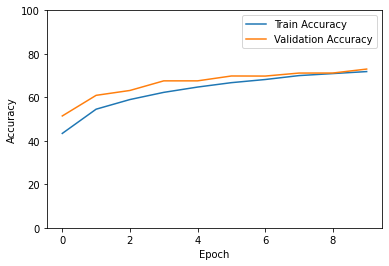

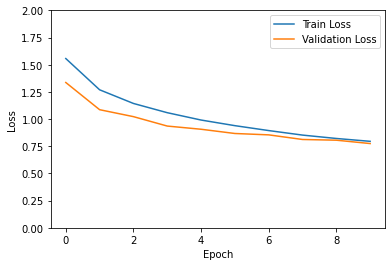

In [23]:
plot_training_history(history)

### Evaluate Model

#### Load the Best Model

In [29]:
model = load_model('cifar.weights.best.hdf5')

In [32]:
test_acc = model.evaluate(X_test, y_test, verbose=1)
print(f'Test accuracy: {test_acc[1]}')

313/313 [==============================] - 3s 8ms/step - loss: 0.7939 - accuracy: 0.7239
Test accuracy: 0.7239000201225281


### Inference

In [43]:
CIFAR10_LABELS = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

In [44]:
y_pred = model.predict(X_test)

In [45]:
y_pred[0]

array([0.01894803, 0.00256711, 0.0351896 , 0.4590163 , 0.00636967,
       0.29382062, 0.10591167, 0.01152758, 0.06117308, 0.0054763 ],
      dtype=float32)

<p>Plot a random sample of test images with their expected (ground truth) and predicted labels.</p>

In [46]:
# pick 32 random image IDs from the total 10000 images 
random_ids = np.random.choice(10000, size=32, replace=False)

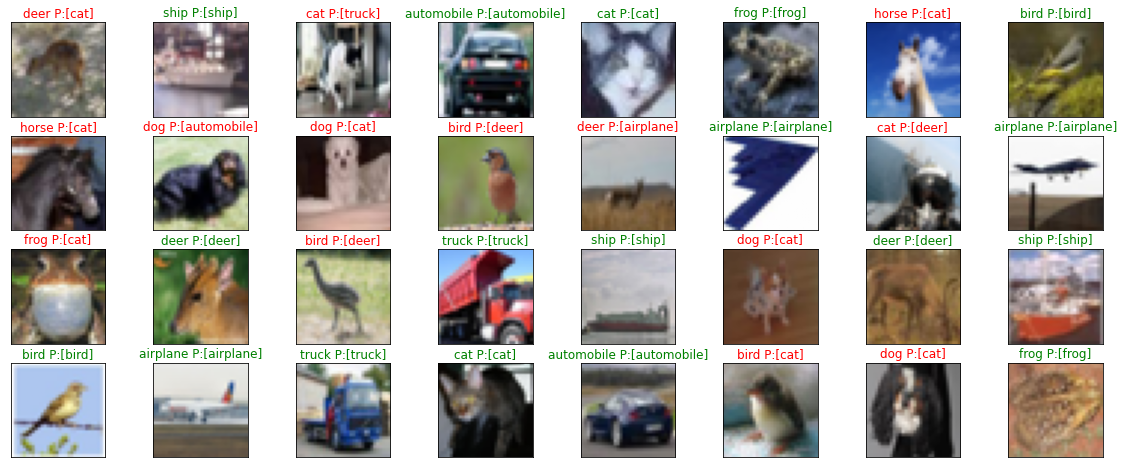

In [50]:
fig = plt.figure(figsize=(20, 8))
for i, idx in enumerate(random_ids):
    ax = fig.add_subplot(4, 8, i+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(X_test[idx]))
    pred_idx = np.argmax(y_pred[idx])
    true_idx = np.argmax(y_test[idx])
    ax.set_title('{} P:[{}]'.format(CIFAR10_LABELS[true_idx],
                                    CIFAR10_LABELS[pred_idx]),
                                    color=('green' if pred_idx == true_idx else 'red'))